In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker

import os
import sys 
sys.path.append("../src")
from Fitness.Brookesia import Calculate_Brookesia


In [2]:
yaml = YAML()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D_1case"
main_Path = os.getcwd()
flag_output = True

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_A.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_B.csv")

In [5]:
Err_s_red,Err_T_red,Err_IDT_red = Calculate_Brookesia(data_d,data_r,data,main_Path,flag_output)
Err_s_red_A,Err_T_red_A ,Err_IDT_red_A= Calculate_Brookesia(data_d,data_o,data,main_Path,flag_output)
Err_s_red_B,Err_T_red_B,Err_IDT_red_B = Calculate_Brookesia(data_d,data_ob,data,main_Path,flag_output)

In [6]:
print(Err_IDT_red)
print(Err_IDT_red_A)
print(Err_IDT_red_B)

[np.float64(-0.1054421768707483)]
[np.float64(-0.11224489795918369)]
[np.float64(0.05102040816326525)]


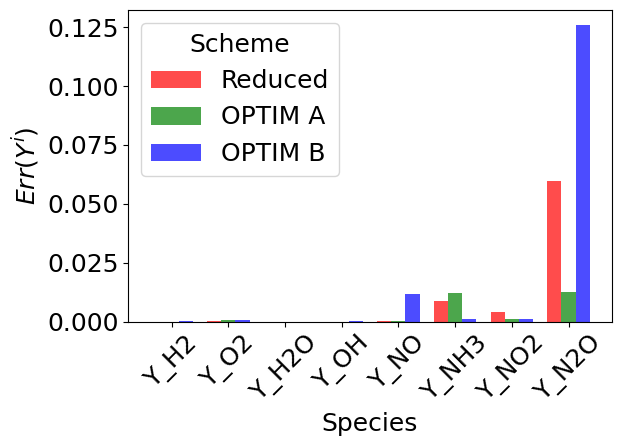

In [12]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()
Brookesia = [species for species, values in data.items() if values["Brookesia"] == 1]

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(Brookesia))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, np.array(Err_s_red[0])**2, width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, np.array(Err_s_red_A[0])**2, width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, np.array(Err_s_red_B[0])**2, width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.xlabel("Species")
plt.ylabel(r"$Err(Y^i)$")
plt.xticks(x, Brookesia, rotation=45)
plt.legend(title="Scheme")
plt.tight_layout()
plt.savefig("BROOKESIA_SPECIES.png")

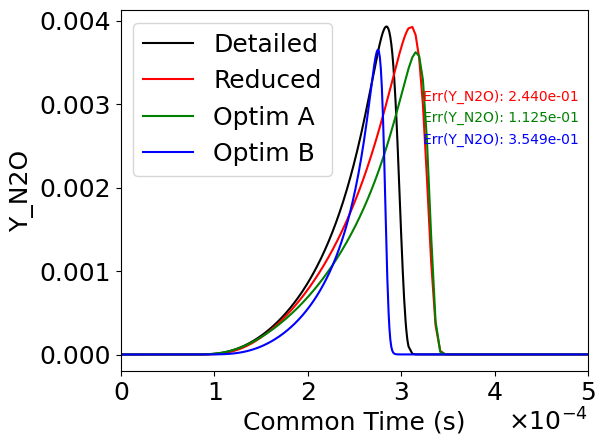

In [14]:
species = "Y_N2O"
plt.figure()

# Tracé des courbes
plt.plot(data_d["common_grid"], data_d[species], 'k', label="Detailed")
plt.plot(data_d["common_grid"], data_r[species], 'r', label="Reduced")
plt.plot(data_d["common_grid"], data_o[species], 'g', label="Optim A")
plt.plot(data_d["common_grid"], data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.xlim([0, 0.0005])
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = Err_s_red[0][Brookesia.index(species)]
val_o = Err_s_red_A[0][Brookesia.index(species)]
val_ob = Err_s_red_B[0][Brookesia.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"Err({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"Err({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"Err({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"BROOKESIA_{species}.png")


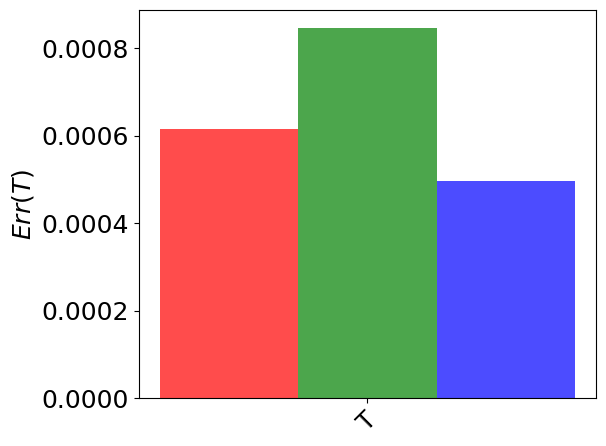

In [9]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["T"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, Err_T_red, width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, Err_T_red_A, width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, Err_T_red_B, width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels
plt.ylabel(r"$Err(T)$")
plt.xticks(x, ["T"], rotation=45)
plt.tight_layout()
plt.savefig("BROOKESIA_T.png")

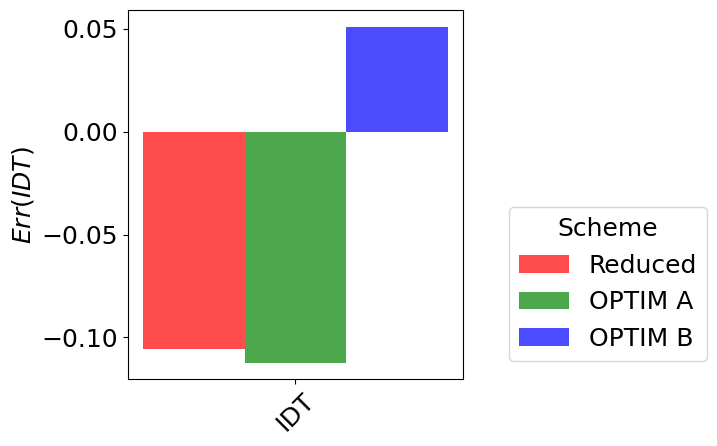

In [13]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["IDT"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, Err_IDT_red, width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, Err_IDT_red_A, width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, Err_IDT_red_B, width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel(r"$Err(IDT)$")
plt.xticks(x, ["IDT"], rotation=45)
plt.legend(title="Scheme",bbox_to_anchor=(1.1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("BROOKESIA_IDT.png")